### Loading Datasets from Excel

In [108]:
import pandas as pd
import numpy as np

# Load my excel file:

file_path = 'Unicorn_Companies.xlsx'
sheet_name = 'Unicorn_Companies'
uc = pd.read_excel(file_path, sheet_name)

# Show basic information about the dataset
uc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   object        
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country           1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   object        
 9   Select Investors  1073 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 84.0+ KB


#### Datasets Observations:

1. It is observed that there are 1074 total rows and 10 columns in the datasets
2. There are 16 and 1 missing values in the "city" and "select Investors" column respectively.
3. According to the data dictionary, the "Valuation" and "Funding" are supposed to be integers/float data data type and not object data type that it is.


### Data Cleaning, Manipulation and Transformation: To derive relevant and good insights from this data, there is a need for us to performe various data cleaning, manipulation and transformation such as:
- To convert "Valuation" and "Funding" columns data types from object to interger. 
- To identify and replace missing/null values.
- There is need to convert the "date" column to "Datetime" and create a new column called "Years to Unicorn" which is the calculation of the year it takes a company to attain Unicorn stage.
- Merge the "Artificial Intelligence" industry that appeared twice together. 

In [109]:
# Merge the instances of "Artificial Intelligence" into a single category
uc['Industry'] = uc['Industry'].replace('Artificial intelligence ', 'Artificial Intelligence')

In [110]:
# Converting Valuation column to integer in billions
uc['Valuation'] = uc['Valuation'].astype(str).str.replace('[^\d\.]', '', regex=True)
uc['Valuation'] = uc['Valuation'].str.replace('B', '').astype(float)

# Converting the Funding column to interger in billions     
# Define conversion function
def funding_conversion(value):
    if value.endswith('B'):
        return float(value[1:-1])
    elif value.endswith('M'):
        return float(value[1:-1]) / 1000
    elif value == '$0M':
        return 0.000000001
    elif value == '$0B':
        return 0.000000001
    else:
        return None
    
# Applying the conversion function to the 'Funding' column
uc['Funding'] = uc['Funding'].apply(funding_conversion)

In [111]:
uc.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,180.0,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.0,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100.0,2012-12-01,Other,Hawthorne,United States,North America,2002,7.0,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100.0,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.0,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95.0,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.0,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46.0,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.0,"Institutional Venture Partners, Sequoia Capita..."


In [112]:
# Identifying and Replace all missing/null values with - and 0
uc['City'].fillna(value = '-', inplace = True)
uc['Select Investors'].fillna(value = '-', inplace = True)
uc['Funding'].fillna(value = 0.000000001, inplace = True)
uc['Funding'] = uc['Funding'].replace(0, 0.000000001)

In [113]:
# Convert 'Date Joined' column to Datetime format
uc['Date Joined'] = pd.to_datetime(uc['Date Joined'])

# Create a new column to calculate the number of years it takes a company to attain unicorn state.
uc['Years to Unicorn'] = (uc['Date Joined'].dt.year - uc['Year Founded']).fillna(0).astype(int)

In [114]:
# Convert 'Funding' column to numeric
uc['Funding'] = pd.to_numeric(uc['Funding'])

# Calculating the Rate on Investment (ROI) based on the valuation and funding of the unicorn company
uc['ROI'] = (uc['Valuation'] - uc['Funding']) / uc['Funding']

# Calculate the annual Rate on Investment based on years to unicorn
uc['Annual ROI'] = uc['ROI'] / uc['Years to Unicorn']

In [115]:
uc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   float64       
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1074 non-null   object        
 5   Country           1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   float64       
 9   Select Investors  1074 non-null   object        
 10  Years to Unicorn  1074 non-null   int32         
 11  ROI               1074 non-null   float64       
 12  Annual ROI        1074 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int32(1), int64(1), object(6)
memory usage: 

In [116]:
uc.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Years to Unicorn,ROI,Annual ROI
0,Bytedance,180.0,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.0,"Sequoia Capital China, SIG Asia Investments, S...",5,21.500000,4.300000
1,SpaceX,100.0,2012-12-01,Other,Hawthorne,United States,North America,2002,7.0,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,13.285714,1.328571
2,SHEIN,100.0,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.0,"Tiger Global Management, Sequoia Capital China...",10,49.000000,4.900000
3,Stripe,95.0,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.0,"Khosla Ventures, LowercaseCapital, capitalG",4,46.500000,11.625000
4,Klarna,46.0,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.0,"Institutional Venture Partners, Sequoia Capita...",6,10.500000,1.750000


In [117]:
# Statistical Summary of the numeric columns

uc.describe()

,Valuation,Year Founded,Funding,Years to Unicorn,ROI,Annual ROI
count,1074.000000,1074.000000,1.074000e+03,1074.000000,1.074000e+03,1074.000000
mean,3.455307,2012.895717,5.510428e-01,7.000931,1.955308e+07,inf
std,8.547022,5.698573,8.077194e-01,5.329672,2.127996e+08,NaN
min,1.000000,1919.000000,1.000000e-09,-4.000000,-5.000000e-01,-1.405629
25%,1.000000,2011.000000,2.180000e-01,4.000000,2.497378e+00,0.357264
50%,2.000000,2014.000000,3.650000e-01,6.000000,4.263158e+00,0.719699
75%,3.000000,2016.000000,6.030000e-01,9.000000,7.376120e+00,1.466631
max,180.000000,2021.000000,1.400000e+01,98.000000,4.000000e+09,inf


### OBSERVATION:

After the data cleaning, manipulation and transformation done;

- The Valuation and Funding Column are now in proper data type.
- 3 new columns; Years to Unicorn, ROI, and Annual ROI were created to aid analysis
- Missing values were replaced with '0' in float data type and '-' in object data type.
- The separated "Artificial Intelligence" industry are not merged into single row under the industry column.
- There are no longer any missing values.


### UNIVARIATE ANALYSIS

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

#### ANALYSIS 1: 
Which unicorn companies have had the biggest return on investment?

**__Otto Bock Healthcare and SSENSE are the companies with the biggest ROI__**

In [119]:
# Companies with the biggest ROI

top_roi_companies = uc.nlargest(10, 'ROI')
print("Companies with the biggest ROI:")
print(top_roi_companies[['Company', 'ROI']])

# Restructure the data for tabulation
table_data = top_roi_companies[['Company', 'ROI']].values.tolist()

# Print the tabulated data
print("Companies with the biggest ROI:")
print(tabulate(table_data, headers=['Company', 'ROI'], tablefmt='pretty'))

Companies with the biggest ROI:
                  Company           ROI
189  Otto Bock HealthCare  4.000000e+09
215                SSENSE  4.000000e+09
424               Uplight  2.000000e+09
567                   ISN  2.000000e+09
639            SITECH DEV  1.000000e+09
651              Xiaobing  1.000000e+09
717                Veepee  1.000000e+09
733             DistroKid  1.000000e+09
866              Assembly  1.000000e+09
890          Carson Group  1.000000e+09
Companies with the biggest ROI:
+----------------------+--------------------+
|       Company        |        ROI         |
+----------------------+--------------------+
| Otto Bock HealthCare | 3999999998.9999995 |
|        SSENSE        | 3999999998.9999995 |
|       Uplight        | 1999999998.9999998 |
|         ISN          | 1999999998.9999998 |
|      SITECH DEV      |    999999999.0     |
|       Xiaobing       |    999999999.0     |
|        Veepee        |    999999999.0     |
|      DistroKid       |    99999999

#### ANALYSIS 2: 

What is the count of the Unicorn Companies by Industry? 

**_Observation_**:
**_- The Fintech Industry has more Unicorns companies compare to other industry while the Artificial Intelligence industry appears to have the least. This is a growing industry and it is expected that this might change in the coming years._**

**_- The top 5 industry with Unicorn Companies are Fintech, Internet Software & Services, E-commerce & Direct-to-Consumer, Health, and Artificial Intelligence and Investors are advised to look into any of these five industries for future investment decisions._**

Fintech                                224
Internet software & services           205
E-commerce & direct-to-consumer        111
Health                                  74
Artificial intelligence                 73
Other                                   58
Supply chain, logistics, & delivery     57
Cybersecurity                           50
Data management & analytics             41
Mobile & telecommunications             38
Hardware                                34
Auto & transportation                   31
Edtech                                  28
Consumer & retail                       25
Travel                                  14
Artificial Intelligence                 11
Name: Industry, dtype: int64


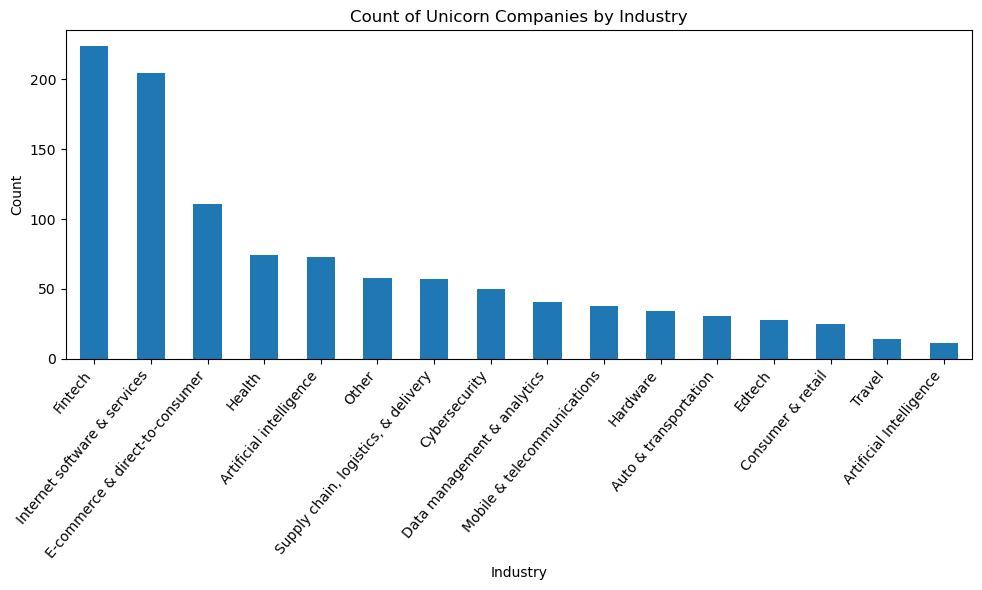

In [127]:
# Count of Unicorn Companies by Industry

industry_counts = uc['Industry'].value_counts()
uc['Industry'].value_counts()
print(industry_counts)

# Create a bar plot
plt.figure(figsize=(10, 6))
industry_counts.plot(kind='bar')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.title('Count of Unicorn Companies by Industry')
plt.xticks(rotation=50, ha = 'right')
plt.tight_layout()
plt.show()

#### ANALYSIS 3: 

Which countries have the most unicorns? Are there any cities that appear to be industry hubs?

#### **_Observations:_**

**_- The United States appears to be the country with the most Unicorns with 562 Unicorn Companies, followed by China with 173, India 65, United Kingdom 43, and Germany 26 to make the top five countries with highest Unicorn Companies._**

**_- San Fransciso appears to be the city to be the industry hurb with an aggregate of 105 Unicorn Companies in the city spread across 4 industry (Internet software & services, Fintech, Consumer & Retail, and Supply chain, logistics, & delivery)._**

In [128]:
import pandas as pd
from tabulate import tabulate

# Count unicorns by country
country_counts = uc['Country'].value_counts()

# Display the countries with the most unicorns
print("Countries with the most unicorns:")
print(country_counts)

# Identify industry hubs by city
industry_city_counts = uc.groupby(['Industry', 'City']).size().reset_index(name='Counts')
industry_city_hubs = industry_city_counts.sort_values(by='Counts', ascending=False).groupby('Industry').head(1)

# Restructure the data for tabulation
table_data = industry_city_hubs[['Industry', 'City', 'Counts']].values.tolist()

# Print the tabulated data
print("\nIndustry hubs by city:")
print(tabulate(table_data, headers=['Industry', 'City', 'Counts'], tablefmt='pretty'))

Countries with the most unicorns:
United States           562
China                   173
India                    65
United Kingdom           43
Germany                  26
France                   24
Israel                   20
Canada                   19
Brazil                   16
Singapore                12
South Korea              12
Australia                 8
Hong Kong                 6
Mexico                    6
Indonesia                 6
Netherlands               6
Sweden                    6
Switzerland               5
Japan                     5
Ireland                   5
Finland                   4
Norway                    4
United Arab Emirates      3
Turkey                    3
Spain                     3
Belgium                   3
Chile                     2
South Africa              2
Philippines               2
Thailand                  2
Estonia                   2
Vietnam                   2
Austria                   2
Colombia                  2
Denmark       

#### ANALYSIS 4:

Which investors have funded the most unicorns?

**_Observation:_**

**_ACCEL(60), Tiger Global Management(53), Andreessen Horowitz(53), Sequoia Capital China(48), and Insight Partners(47) are top 5 investors with the most funded record, i.e that has funded the most unicorns_**

In [129]:
# Split the values in the column by comma
uc['Investors'] = uc['Select Investors'].str.split(', ')

# Explode the column to have each value in a separate row
uc = uc.explode('Investors')

Accel                      60
Tiger Global Management    53
Andreessen Horowitz        53
Sequoia Capital China      48
Insight Partners           47
Name: Investors, dtype: int64


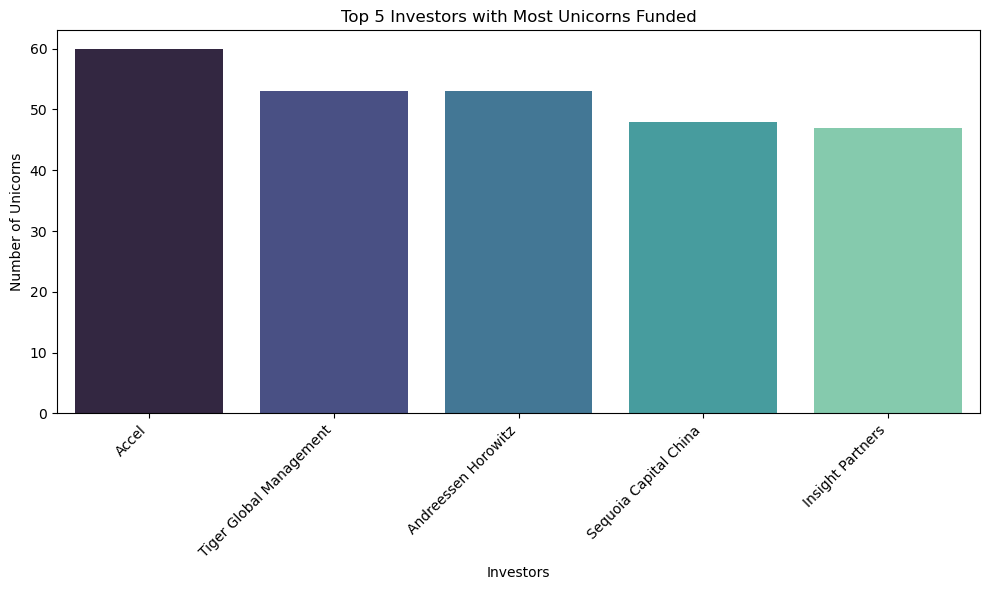

In [130]:
# Count the number of investors per unicorn and select the top 5
top_investors = uc['Investors'].value_counts().nlargest(5)
print(top_investors)

# Create a bar chart for top five investors with most Unicorn funded 
plt.figure(figsize = (10, 6))
sns.barplot(x = top_investors.index, y = top_investors.values, palette = 'mako')
plt.xlabel('Investors')
plt.ylabel('Number of Unicorns')
plt.title('Top 5 Investors with Most Unicorns Funded')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()

plt.show()

### BIVARIATE ANALYSIS

#### ANALYSIS 5:
Description of Valuation and Funding of Unicorn Companies by Industry

**_Observation_**:

**_The Artificial Intelligence Industry has the highest valuation by funding by industry relationship and this is shown in its USD180B valuation and USD8B funding received to far._**

**_At the bottom left of the plot is the concentration of various companies representing various industry making up the majority of companies with less than USD50B valuation and less than USD2B funding received so far._**

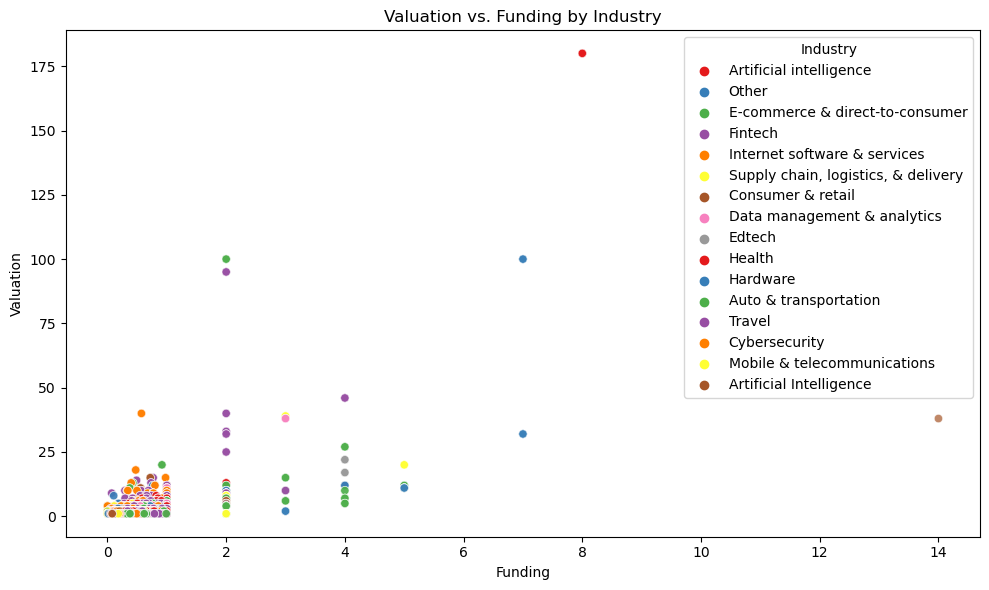

In [131]:
# Valuation vs. Funding of Unicorn Companies by Industry
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=uc, x='Funding', y='Valuation', hue='Industry', palette='Set1', alpha=0.7)
plt.title('Valuation vs. Funding by Industry')
plt.xlabel('Funding')
plt.ylabel('Valuation')
plt.tight_layout()
plt.legend(title='Industry')
plt.show()

#### ANALYSIS 6:

Description of Industry and Valuation

**_Observation:_**

**_It is observed also that the Artificial Intelligence Industry has the highest Valuation among other industries with USD180B valuation while the Mobile & Telecommunication has the lowest valuation figure of less than USD2B_**

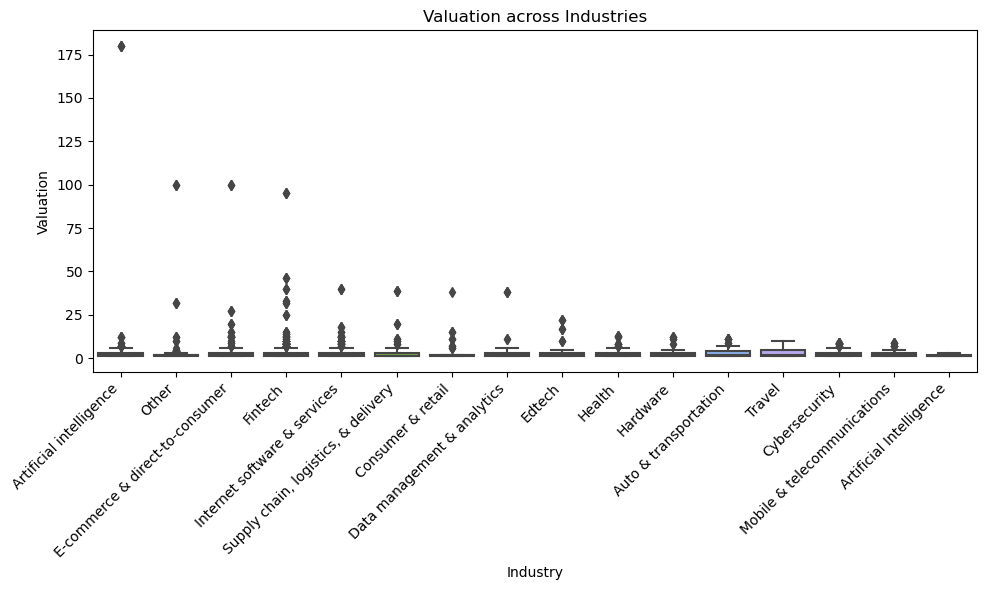

In [132]:
# Create a box plot to show Valuation Across Industries
plt.figure(figsize=(10, 6))
sns.boxplot(data=uc, x='Industry', y='Valuation')
plt.title('Valuation across Industries')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Valuation')
plt.xlabel('Industry')
plt.tight_layout()
plt.show()

#### ANALYSIS 7
Description of Funding Vs Industry

**_Observation:_**

**_From the analysis, it is observed that the Auto and Trasportation Industry has received the highest funding so far followed by the Consumer Retail industry. The Internet Software services received the least funding so far_**

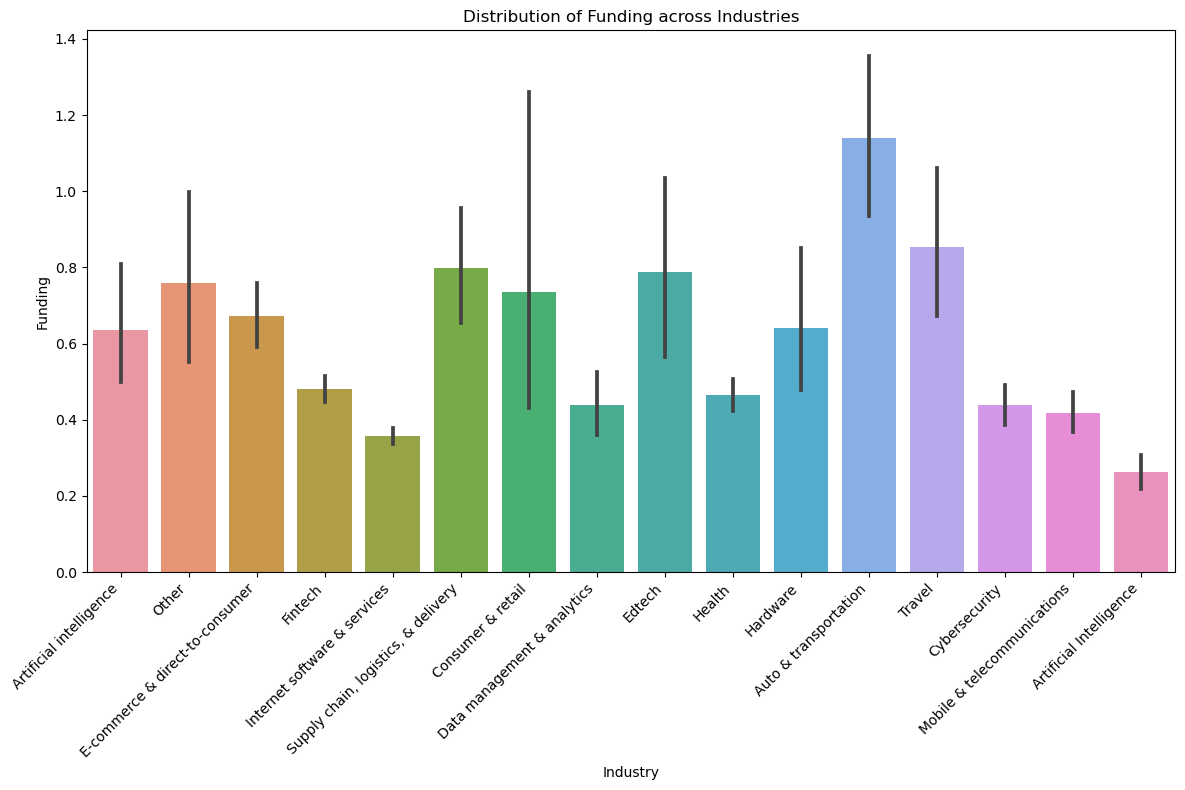

In [133]:
# Create a bar chart to show funding vs industry
plt.figure(figsize=(12, 8))
sns.barplot(data=uc, x='Industry', y='Funding')
plt.title('Distribution of Funding across Industries')
plt.xlabel('Industry')
plt.ylabel('Funding')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### MULTIVARIATE ANALYSIS
#### ANALYSIS 8
Shwoing Correlation distribution of Valuation, Funding, Years to Unicorn and ROI

**_Observation:_**

**_From the analysis,we can conclude that there is a positive correlation between the Funding received and the valuation of each unicorn companies. Furthermore, it is observed that there is no correlation between Years it takes a company to become a unicorn and funding received as well as their valuation._**

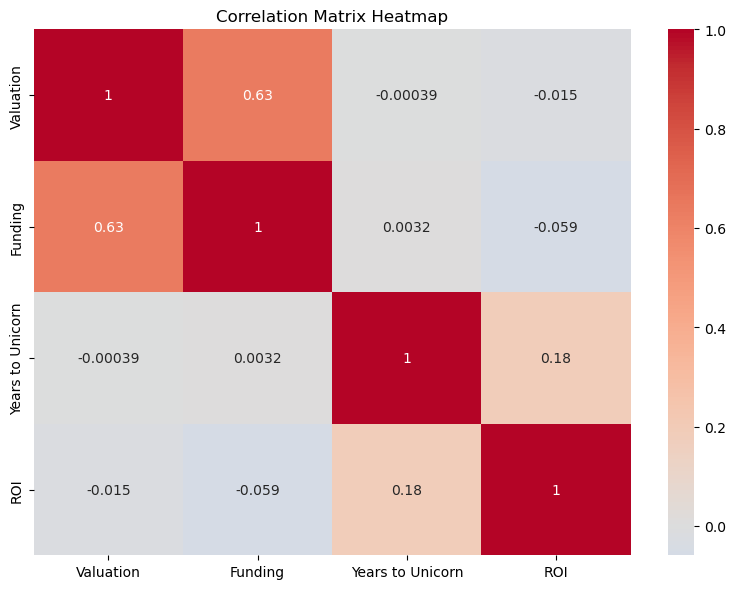

In [134]:
# Select numerical features for multivariate analysis
numerical_features = ['Valuation', 'Funding', 'Years to Unicorn','ROI']

# Calculate the correlation matrix
correlation_matrix = uc[numerical_features].corr()

# Create a correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

### OVERALL OBSERVATIONS:

- Investors can fund Unicorn Companies with Valuation above USD10B as this companies takes average of 6 years to attain Unicorn state.
- Investors can fund more Unicorns companies in the Fintech, Ecommerce and Cosumer Retail Industry as these industries appear to be doing great interms of average valuation.
- Unicorn companies in San Fransciso (USA) appears to be the bride of investors as this city is the industry hub for the top 5 unicorn company.